In [56]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
import torch.optim as optim
import torch.onnx

from sklearn.model_selection import train_test_split
from src.NvidiaCnn import NvidiaCnn
from src.WesternAustraliaCnn import NvidiaCnnByWesternAustralia
from src.Cnn import CNN
from src.Cnn_2 import CNN_2
from src.train import run_training
from src.data import get_images_annotations, RobotDataset

### Load & preprocess the data

In [2]:
DATA_PATH = "./dataset"
images_annotations = get_images_annotations(DATA_PATH)

In [3]:
# TODO: preprocess the image in `transform`
dataset = RobotDataset(images_annotations)
train_data, val_data = train_test_split(dataset, test_size=0.2, random_state=42)

In [4]:
batch_size = 32
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_data, batch_size=batch_size, shuffle=True)

In [5]:
# might be useful - if not feel free to delete 
# for batch in val_loader:
#     images, forward_signals, left_signals = batch
#     print("Batch shape:", images.shape, forward_signals.shape, left_signals.shape)

### NVIDIA CNN

In [6]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
device

device(type='cpu')

In [ ]:
model = NvidiaCnn()
optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.MSELoss()
epochs = 20

In [ ]:
train_history, val_history = run_training(model, train_loader, val_loader, optimizer, criterion, epochs, device)

In [ ]:
plt.plot(np.arange(epochs), train_history, marker="o")
plt.plot(np.arange(epochs), val_history, marker="o")
plt.legend(["train", "val"])
plt.show()

### Export to onnx

In [ ]:
x = torch.randn(1, 3, 224, 224, requires_grad=True).to(device)

torch.onnx.export(model,
                  x,
                  "model.onnx",
                  export_params=True,
                  opset_version=11)

### Train Model #2

In [ ]:
model = NvidiaCnnByWesternAustralia()
optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.MSELoss()
epochs = 10

In [ ]:
train_history, val_history = run_training(model, train_loader, val_loader, optimizer, criterion, epochs, device)

In [ ]:
plt.plot(np.arange(epochs), train_history, marker="o")
plt.plot(np.arange(epochs), val_history, marker="o")
plt.legend(["train", "val"])
plt.show()

In [ ]:
x = torch.randn(1, 3, 224, 224, requires_grad=True).to(device)

torch.onnx.export(model,
                  x,
                  "WAmodel.onnx",
                  export_params=True,
                  opset_version=11)

### Model 3

In [22]:
model = CNN()
optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.MSELoss()
epochs = 10

In [23]:
train_history, val_history = run_training(model, train_loader, val_loader, optimizer, criterion, epochs, device)

Running training for 10 epochs.


Epoch 0: 100%|██████████| 190/190 [02:20<00:00,  1.35it/s, loss=0.348]


Validation loss=0.3052609750653497


Epoch 1: 100%|██████████| 190/190 [02:38<00:00,  1.20it/s, loss=0.139]


Validation loss=0.06910255096160228


Epoch 2: 100%|██████████| 190/190 [02:27<00:00,  1.28it/s, loss=0.0988]


Validation loss=0.07246449863642555


Epoch 3: 100%|██████████| 190/190 [02:53<00:00,  1.09it/s, loss=0.219] 


Validation loss=0.12369268826323102


Epoch 4: 100%|██████████| 190/190 [04:30<00:00,  1.42s/it, loss=0.145] 


Validation loss=0.17482661403460964


Epoch 5: 100%|██████████| 190/190 [04:00<00:00,  1.27s/it, loss=0.133] 


Validation loss=0.15945122856372415


Epoch 6: 100%|██████████| 190/190 [04:27<00:00,  1.41s/it, loss=0.0509]


Validation loss=0.1457777435644265


Epoch 7: 100%|██████████| 190/190 [04:49<00:00,  1.52s/it, loss=0.184] 


Validation loss=0.19003150959451137


Epoch 8: 100%|██████████| 190/190 [04:47<00:00,  1.51s/it, loss=0.109] 


Validation loss=0.04647162916341913


Epoch 9: 100%|██████████| 190/190 [04:58<00:00,  1.57s/it, loss=0.066] 


Validation loss=0.033572588862308544


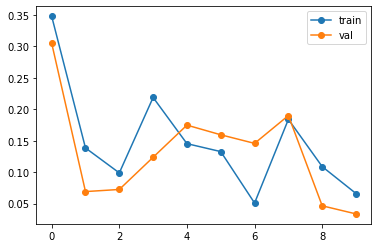

In [25]:
plt.plot(np.arange(epochs), train_history, marker="o")
plt.plot(np.arange(epochs), val_history, marker="o")
plt.legend(["train", "val"])
plt.show()

In [24]:
x = torch.randn(1, 3, 224, 224, requires_grad=True).to(device)

torch.onnx.export(model,
                  x,
                  "model_2.onnx",
                  export_params=True,
                  opset_version=11)

In [52]:
model = CNN_2()
optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.MSELoss()
epochs = 10

In [53]:
train_history, val_history = run_training(model, train_loader, val_loader, optimizer, criterion, epochs, device)

Running training for 10 epochs.


Epoch 0: 100%|██████████| 190/190 [03:47<00:00,  1.20s/it, loss=0.217]


Validation loss=0.441839183794558


Epoch 1: 100%|██████████| 190/190 [05:05<00:00,  1.61s/it, loss=0.102] 


Validation loss=0.07165153187194959


Epoch 2: 100%|██████████| 190/190 [05:49<00:00,  1.84s/it, loss=0.126] 


Validation loss=0.14319544181903573


Epoch 3: 100%|██████████| 190/190 [09:17<00:00,  2.93s/it, loss=0.0855]


Validation loss=0.11182627063090186


Epoch 4: 100%|██████████| 190/190 [06:58<00:00,  2.20s/it, loss=0.0235]


Validation loss=0.06708713838255352


Epoch 5: 100%|██████████| 190/190 [08:25<00:00,  2.66s/it, loss=0.0913]


Validation loss=0.0850637840967412


Epoch 6: 100%|██████████| 190/190 [08:48<00:00,  2.78s/it, loss=0.141] 


Validation loss=0.05598551921678216


Epoch 7: 100%|██████████| 190/190 [09:18<00:00,  2.94s/it, loss=0.0363]


Validation loss=0.08917433223979482


Epoch 8: 100%|██████████| 190/190 [09:33<00:00,  3.02s/it, loss=0.067] 


Validation loss=0.06310955968945355


Epoch 9: 100%|██████████| 190/190 [09:02<00:00,  2.86s/it, loss=0.0396]


Validation loss=0.12306562910470387


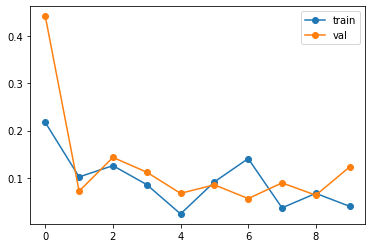

In [54]:
plt.plot(np.arange(epochs), train_history, marker="o")
plt.plot(np.arange(epochs), val_history, marker="o")
plt.legend(["train", "val"])
plt.show()

In [ ]:
x = torch.randn(1, 3, 224, 224, requires_grad=True).to(device)

torch.onnx.export(model,
                  x,
                  "model_3.onnx",
                  export_params=True,
                  opset_version=11)